 # Linear regression model
 ##  Preparing the data, fitting, feature sellection and evaluation
 
 This notebook is based on several online resources. Talking about liner regression model basics.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# read the datase into pandas to observe the dataset
ads_df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
ads_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
ads_df.shape

(200, 4)

The imported dataset incldes 200 observations, 4 variables.

According to the original data source - **TV**, **radio** and **newspaper** columns refer to $1000s spent on advertisement through respective channels, where as **sales** is the number of units of goods sold. Thus the advertisement channels will be used as *features* and the sales variable will be the *responce* in our dataset.

Each observation of 200 in this dataset represents a single market.

Because this is a continuous dataset Liner regression model should be a fitting choice.

In [4]:
ads_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Looking at the data TV is the most expencive channel of advertisement.

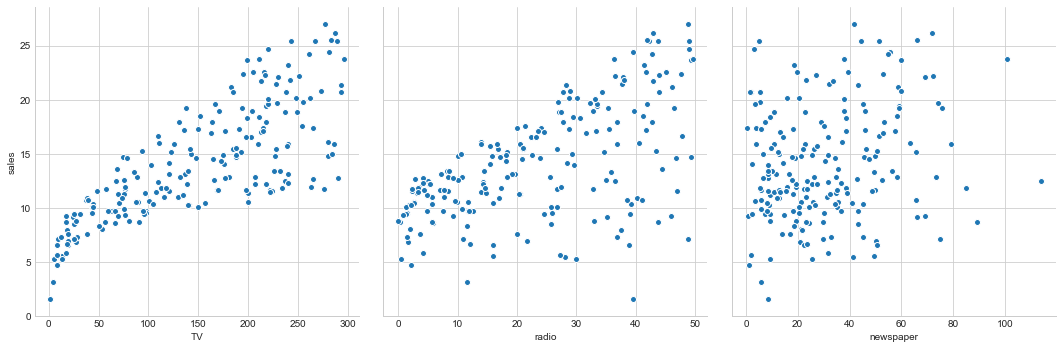

In [5]:
# Visualising relationship between each of features and the responce variables
# using an inbuilt seaborn function Pairplot which prints multiple distribution plots
# of each feature and the responce.
sns.pairplot(ads_df, x_vars = ['TV','radio','newspaper'], y_vars = 'sales', size = 5);

# Preparing data for the model

Assign data to the feature matrix 'X' and the responce vectore 'y'.

In [6]:
# Identify feature columns
features = ['TV']
# Create a subset of data as feature matrix
X = ads_df[features]
# Assign responce vector, it will have to be a numPy array
y = ads_df['sales']

Split X and y into train and test functions

In [7]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [8]:
# Verify
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 1)
(150,)
(50, 1)
(50,)


# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
# instantiate
# using only TV as one feature 
linreg = LinearRegression()
# fit the models
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [10]:
print(linreg.intercept_)
# pair the feature names with the coefficients
list(zip(features, linreg.coef_))

6.91197261887


[('TV', 0.048029450047792167)]

### Linear regression

Form of linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y$ is the response
$\beta_0$ is the intercept
$\beta_1$ is the coefficient for $x_1$ (the first feature)
$\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

In [11]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print (y_pred)

[ 17.03658069  16.63793625  11.50839099  20.36982452  19.10184704
  20.53312465  14.75518181  15.59569719  10.30285179  17.25751616
  14.81281715  10.23561056  17.22389554  12.18560623  17.75702244
  12.94927449  13.23745119  20.87413375   8.14152654  17.03177774
  11.7341294   10.16836933   8.11751182  12.07033555  12.33449753
  15.96072101   8.98204192  18.86169979  14.92328489  18.44384358
  18.43423769  18.17487866  14.10198129  15.08658502  18.84248801
  15.79261793  17.59372231  13.12698346  17.32475739   7.85334984
   7.54115841  11.2538349    7.81012333  16.71478337   7.2625876
  13.98671061  10.66787561  17.86268723  16.75800988  17.9347314 ]


### Plotting the least square line for predictions

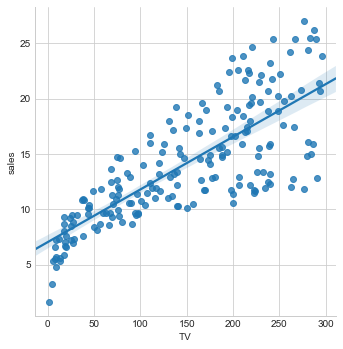

In [12]:
sns.pairplot(ads_df, x_vars=['TV'], y_vars='sales', size=5, kind='reg');

In [13]:
# print the R-squared value for the linear regression model
# where the only feature is TV
linreg.score(X, y)

0.61172367003374672

# Multiple Linear Regression model

We need to see how other features interract with the responce (Sales)

In [14]:
# Identify feature columns
features = ['TV','radio','newspaper']
# Create a subset of data as feature matrix
X = ads_df[features]
# Assign responce vector, it will have to be a numPy array
y = ads_df['sales']

# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

# instantiate model
multiple_linreg = LinearRegression()
# fit the models
multiple_linreg.fit(X_train, y_train)

# Result
print(multiple_linreg.intercept_)
# pair the feature names with the coefficients
list(zip(features, multiple_linreg.coef_))

2.87696662232


[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

**The given numbers result in following:**
$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$
Interpreting a **TV coefficient**
- For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

Similarly **radio coefficient** may be interpreted as follows:

- An additional $1000 ("unit") of ad spending on radio advertisement is associated with an increase in sales of 179 items; provided that TV and newspaper sales are constant.

**Newspaper coefficient** may be interpreted as follows:
- For a given amount of Radio and TV ad spending, an additional $1,000 spent on newspaper ads is associated with an increase in sales of just 3.5 items.

Important notes:

- This is a statement of association, not causation. Thus we cannot explicitly state that one or the other advertisement channel is directly attributed to an increase in sales.
- If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

[(Interpretation credit)](https://www.youtube.com/watch?v=3ZWuPVWq7p4&index=7&t=5s&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)

### Model prediction
Final step for this process is trying to predict the outcome based on out of training samle data.

In [16]:
# make predictions on the testing set
y_pred = multiple_linreg.predict(X_test)
print (y_pred)

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


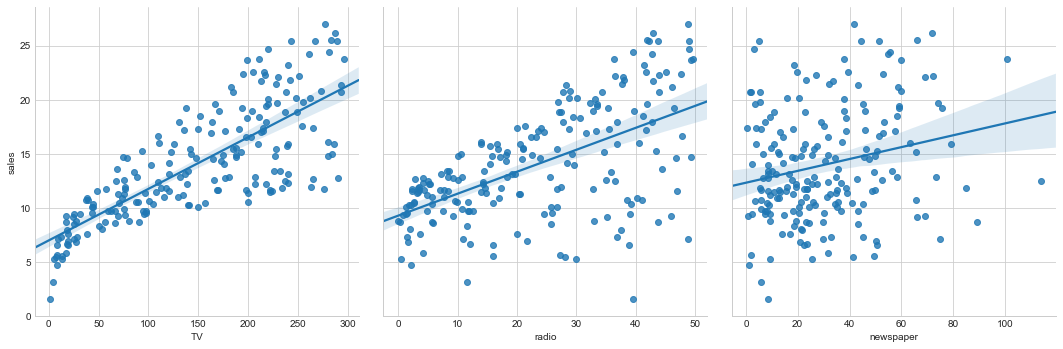

In [17]:
# Visualising
sns.pairplot(ads_df, x_vars=['TV','radio','newspaper'], y_vars='sales', size=5, kind='reg');

________________________________________

# Model evaluation

### Overall evaluation

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model.

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

In [18]:
# print the R-squared value for the multiple linear 
# regression model, where the only feature is TV
multiple_linreg.score(X, y)

0.896316123304573

However it is important to know that R-squared value does not account for the model complexity, and thus will keep increasing with the increasing number of features in the model, even if those features have little to do with the model itself. In other words, if, for example we were to use more than initial TV, radio and newspaper features, the R-squared will become even closer to 1. This is not ideal, since we have visually observed that newspaper does not nessesarily contribute to increase in sales.

# Feature sellection

As stated above, using more features does not always constitute for a better or more acurate predictions. Below are three most common metrics for **evaluating a regression model**:

It is very important to know
**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors, or **Standard deviation of residuals** - a measure of how well (on average) the actual data points agree witht he linear model, a good explanation [in this video](https://www.youtube.com/watch?v=zMFdb__sUpw):

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [15]:
from sklearn import metrics

# include Newspaper
X = ads_df[['TV', 'radio', 'newspaper']]
y = ads_df.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
multiple_linreg = LinearRegression()
multiple_linreg.fit(X_train, y_train)
y_pred = multiple_linreg.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


The rule of thumb here is that, the lower this number is, the better a linear regression model would fit.

In [23]:
# exclude Newspaper
X = ads_df[['TV', 'radio']]
y = ads_df.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
multiple_linreg = LinearRegression()
multiple_linreg.fit(X_train, y_train)
y_pred = multiple_linreg.predict(X_test)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


RMSE without newspaper provides a better result, which confirms initial hypothesis.